# Challenge 1 by Fitra Anugrah
## Nutrition Fact for McDonald's Menu
Work with your data!

a) How many calories does the average McDonald's value meal contain?

b) How much do beverages, like soda or coffee, contribute to the overall caloric intake?

c) Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

d) What about ordering egg whites instead of whole eggs?

e) What is the least number of items could you order from the menu to meet one day's nutritional requirements?

In [98]:
# import library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# baca dataset menu.csv

df = pd.read_csv('/content/drive/My Drive/dataset/mcd/menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [100]:
# bersihkan data
# periksa apakah ada missing data

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Category
False    260
Name: Category, dtype: int64

Item
False    260
Name: Item, dtype: int64

Serving Size
False    260
Name: Serving Size, dtype: int64

Calories
False    260
Name: Calories, dtype: int64

Calories from Fat
False    260
Name: Calories from Fat, dtype: int64

Total Fat
False    260
Name: Total Fat, dtype: int64

Total Fat (% Daily Value)
False    260
Name: Total Fat (% Daily Value), dtype: int64

Saturated Fat
False    260
Name: Saturated Fat, dtype: int64

Saturated Fat (% Daily Value)
False    260
Name: Saturated Fat (% Daily Value), dtype: int64

Trans Fat
False    260
Name: Trans Fat, dtype: int64

Cholesterol
False    260
Name: Cholesterol, dtype: int64

Cholesterol (% Daily Value)
False    260
Name: Cholesterol (% Daily Value), dtype: int64

Sodium
False    260
Name: Sodium, dtype: int64

Sodium (% Daily Value)
False    260
Name: Sodium (% Daily Value), dtype: int64

Carbohydrates
False    260
Name: Carbohydrates, dtype: int64

Carbohydrates (% Daily Value)
Fals

In [101]:
# missing data tidak ditemukan, selanjutnya
# lihat pembagian kategori

df['Category'].unique().tolist()

['Breakfast',
 'Beef & Pork',
 'Chicken & Fish',
 'Salads',
 'Snacks & Sides',
 'Desserts',
 'Beverages',
 'Coffee & Tea',
 'Smoothies & Shakes']

In [102]:
# tampilkan statistika deskriptif dikelompokkan berdasarkan kategori

df_ctg = df[['Category','Item','Calories']]
a = df_ctg.groupby(['Category'],as_index = True).describe()
a

Calories                          ...                      
                      count        mean         std  ...    50%    75%     max
Category                                             ...                      
Beef & Pork            15.0  494.000000  141.360734  ...  500.0  570.0   750.0
Beverages              27.0  113.703704   99.194764  ...  100.0  190.0   280.0
Breakfast              42.0  526.666667  221.675072  ...  470.0  570.0  1150.0
Chicken & Fish         27.0  552.962963  306.541688  ...  480.0  610.0  1880.0
Coffee & Tea           95.0  283.894737  157.812808  ...  270.0  370.0   760.0
Desserts                7.0  222.142857  108.083962  ...  250.0  305.0   340.0
Salads                  6.0  270.000000  127.436259  ...  255.0  357.5   450.0
Smoothies & Shakes     28.0  531.428571  230.871365  ...  540.0  692.5   930.0
Snacks & Sides         13.0  245.769231  141.772208  ...  260.0  340.0   510.0

[9 rows x 8 columns]

Pada tabel di atas dapat dilihat statistika deskriptif Kolom Calories berdasarkan kategori.
Rata-rata kalori yang tertinggi terdapat pada kategori **'Chicken & Fish'**, yaitu sebesar **552.96 kcal** sedangkan rata-rata kalori yang terendah terdapat pada kategori **'Beverages'**, yaitu sebesar **113.7 kcal**.

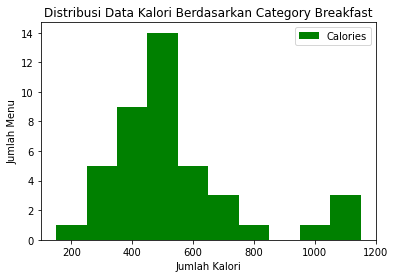

Rata-rata Calories    526.666667
dtype: float64 Breakfast


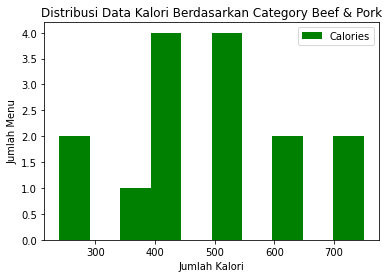

Rata-rata Calories    494.0
dtype: float64 Beef & Pork


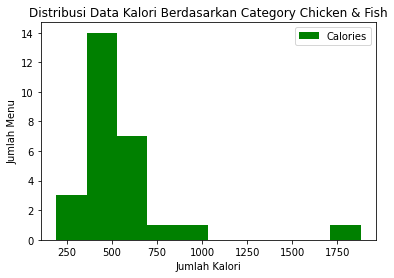

Rata-rata Calories    552.962963
dtype: float64 Chicken & Fish


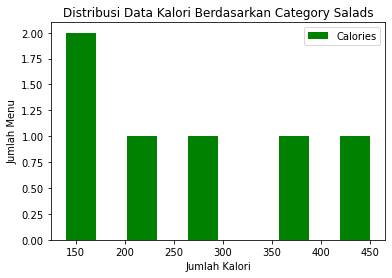

Rata-rata Calories    270.0
dtype: float64 Salads


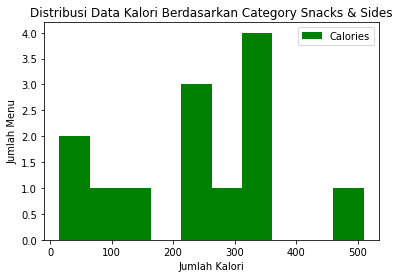

Rata-rata Calories    245.769231
dtype: float64 Snacks & Sides


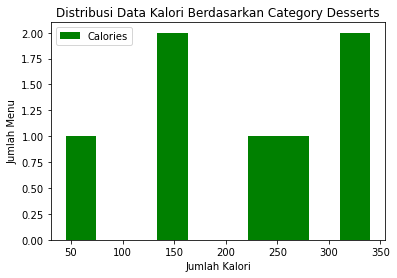

Rata-rata Calories    222.142857
dtype: float64 Desserts


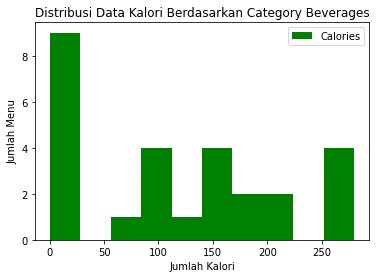

Rata-rata Calories    113.703704
dtype: float64 Beverages


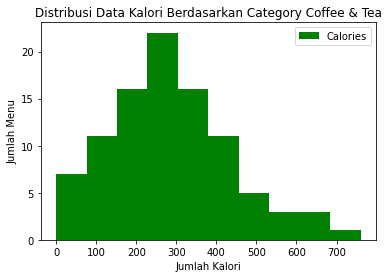

Rata-rata Calories    283.894737
dtype: float64 Coffee & Tea


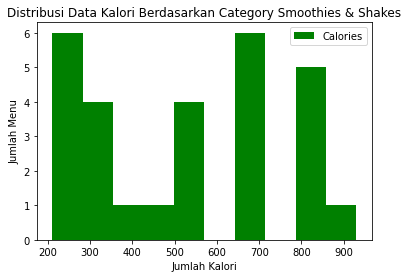

Rata-rata Calories    531.428571
dtype: float64 Smoothies & Shakes


In [103]:
# buat histogram untuk melihat sebaran data pada setiap kategori

CTG = df_ctg['Category'].unique().tolist()
for ctg in CTG:
    df_ctg[df_ctg['Category']==ctg].plot(kind='hist', figsize=(6,4),color='green')
    plt.title('Distribusi Data Kalori Berdasarkan Category '+str(ctg))
    plt.xlabel('Jumlah Kalori')
    plt.ylabel('Jumlah Menu')
  
    plt.show()

    print('Rata-rata', df_ctg[df_ctg['Category']==ctg].mean(),ctg)

# a) How many calories does the average McDonald's value meal contain?

  Untuk menyelesaikan persoalan pertama, saya mengasumsikan 'meal' disini merupakan suatu paket makan lengkap (makanan + minuman).
Sebagaimana yang terdefinisi di wikipedia, "A meal is an eating occasion that takes place at a certain time and includes prepared food.The names used for specific meals in English vary, depending on the speaker's culture, the time of day, or the size of the meal". "A meal is different from a snack in that meals are generally larger, more varied, and more filling than snacks"
[https://en.wikipedia.org/wiki/Meal](https://en.wikipedia.org/wiki/Meal).

Dengan asumsi ini, saya mengelompokkan kategori 'Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides' dan 'Desserts' kedalam kelompok **Foods** dan kategori 'Beverages', 'Coffee & Tea' dan 'Smoothies & Shakes' kedalam kelompok **Drinks**.

In [104]:
# Membagi kategori kedalam 2 kelompok: Foods & Drinks
#foods
df1 = df[df['Category']=='Breakfast']
df2 = df[df['Category']=='Beef & Pork']
df3 = df[df['Category']=='Chicken & Fish']
df4 = df[df['Category']=='Salads']
df5 = df[df['Category']=='Snacks & Sides']
df6 = df[df['Category']=='Desserts']

#drinks
df7 = df[df['Category']=='Beverages']
df8 = df[df['Category']=='Coffee & Tea']
df9 = df[df['Category']=='Smoothies & Shakes']

df_foods = [df1,df2,df3,df4,df5,df6]
df_foods = pd.concat(df_foods)

df_drinks = [df7,df8,df9]
df_drinks = pd.concat(df_drinks)

df_drinks.reset_index(drop = True, inplace=True)
df_drinks.head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,0,0,0,0,39,13,0,0,39,0,0,0,0,0
1,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,0,0,5,0,55,18,0,0,55,0,0,0,0,0
2,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,0,0,5,0,76,25,0,0,76,0,0,0,0,0


In [105]:
print('rata-rata foods = ',df_foods['Calories'].mean())
print('rata-rata drinks = ',df_drinks['Calories'].mean(), end='\n\n')

print('rata-rata meal = ',df_foods['Calories'].mean()+df_drinks['Calories'].mean())

rata-rata foods =  462.09090909090907
rata-rata drinks =  299.46666666666664

rata-rata meal =  761.5575757575757


Kemudian, data yang telah dikelompokkan dicari nilai rata-ratanya, sehingga diperoleh:

rata-rata foods = 462.1, rata-rata drinks = 299.5

kemudian rata-rata *meal* diperoleh dengan menjumlahkan rata-rata foods dan rata-rata drinks.

rata-rata *meal* = 761.56.

# b) How much do beverages, like soda or coffee, contribute to the overall caloric intake?

Untuk menyelesaikan kasus ini, saya mencari persentasi dari rata-rata kalori 'beverages' terhadap rata-rata kalori meal.

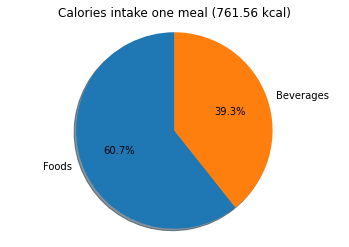

In [106]:
MEAN = [df_foods['Calories'].mean(), df_drinks['Calories'].mean()]
lbl = 'Foods','Beverages'
plt.pie(MEAN, startangle=90, shadow=True, labels=lbl, autopct='%1.1f%%')

plt.title('Calories intake one meal (761.56 kcal)')
plt.axis('equal')
plt.show()

Dapat dilihat pada pie chart di atas, kontribusi kalori **'beverages'** terhadap kalori one meal adalah sebesar **39.3%** 

# c) Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

Dalam menyelesaikan kasus ini, saya mencari jenis makanan **Sandwich** pada kolom 'Item' yang memuat **Grilled Chicken** dan **Crispy Chicken**.

In [107]:
# cari item grilled chicken sandwich dan crispy chicken sandwich

import re

items = df['Item'].values.tolist()

print([match.group (0) for item in items for match in \
       [(re.compile(".*(Crispy Chicken).*(Sandwich).*")).search(item)] if match])
print([match.group (0) for item in items for match in \
       [(re.compile(".*(Grilled Chicken).*(Sandwich).*")).search(item)] if match])

['Premium Crispy Chicken Classic Sandwich', 'Premium Crispy Chicken Club Sandwich', 'Premium Crispy Chicken Ranch BLT Sandwich', 'Bacon Clubhouse Crispy Chicken Sandwich', 'Southern Style Crispy Chicken Sandwich']
['Premium Grilled Chicken Classic Sandwich', 'Premium Grilled Chicken Club Sandwich', 'Premium Grilled Chicken Ranch BLT Sandwich', 'Bacon Clubhouse Grilled Chicken Sandwich']


Terdapat 5 varian Crispy Chicken Sandwich dan 4 varian Grilled Chicken Sandwich. Untuk memudahkan dalam proses komparasi, akan diambil masing-masing 4 varian yang sejenis dari Crispy Chicken Sandwich dan Grilled Chicken Sandwich.


In [108]:
# rekap crispy chicken sandwich & grilled chicken sandwich ke dalam data frame

df_crispy1 = df[df['Item']=='Premium Crispy Chicken Classic Sandwich']
df_crispy2 = df[df['Item']=='Premium Crispy Chicken Club Sandwich']
df_crispy3 = df[df['Item']=='Premium Crispy Chicken Ranch BLT Sandwich']
df_crispy4 = df[df['Item']=='Bacon Clubhouse Crispy Chicken Sandwich']

df_grilled1 = df[df['Item']=='Premium Grilled Chicken Classic Sandwich']
df_grilled2 = df[df['Item']=='Premium Grilled Chicken Club Sandwich']
df_grilled3 = df[df['Item']=='Premium Grilled Chicken Ranch BLT Sandwich']
df_grilled4 = df[df['Item']=='Bacon Clubhouse Grilled Chicken Sandwich']

df_crispy = [df_crispy1,df_crispy2,df_crispy3,df_crispy4]
df_crispy = pd.concat(df_crispy)
df_crispy['Ayam'] = ['Classic','Club','Ranch BLT','Clubhouse']

df_grilled = [df_grilled1,df_grilled2,df_grilled3,df_grilled4]
df_grilled = pd.concat(df_grilled)
df_grilled['Ayam'] = ['Classic','Club','Ranch BLT','Clubhouse']

df_ayam = pd.concat([df_crispy,df_grilled])
df_ayam.reset_index(drop=True, inplace=True)
df_ayam.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Ayam
0,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,45,16,990,41,55,18,3,13,10,24,4,6,15,20,Classic
1,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,0.0,85,29,1410,59,58,19,3,14,11,36,8,20,30,20,Club
2,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,0.0,70,24,1400,58,57,19,3,13,11,32,4,20,15,20,Ranch BLT
3,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10 oz (284 g),750,340,38.0,59,10.0,51,0.5,90,31,1720,72,65,22,4,15,16,36,8,25,30,15,Clubhouse
4,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,65,22,820,34,42,14,3,13,8,28,4,8,15,20,Classic


In [109]:
# ubah format ke satuan gram

df_ayam['Serving Size']

0    7.5 oz (213 g)
1    8.8 oz (249 g)
2    8.1 oz (230 g)
3     10 oz (284 g)
4      7 oz (200 g)
5    8.3 oz (235 g)
6    7.6 oz (217 g)
7    9.5 oz (270 g)
Name: Serving Size, dtype: object

In [110]:
gram = []

for i in range(0,8):
    gram.append(df_ayam['Serving Size'][i][-6:-3])
print(gram)
df_ayam['Serving Size'] = gram
df_ayam[['Serving Size']] = df_ayam[['Serving Size']].astype(int)
df_ayam.head()

['213', '249', '230', '284', '200', '235', '217', '270']


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Ayam
0,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,213,510,200,22.0,33,3.5,18,0.0,45,16,990,41,55,18,3,13,10,24,4,6,15,20,Classic
1,Chicken & Fish,Premium Crispy Chicken Club Sandwich,249,670,300,33.0,51,9.0,44,0.0,85,29,1410,59,58,19,3,14,11,36,8,20,30,20,Club
2,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,230,610,250,28.0,43,6.0,31,0.0,70,24,1400,58,57,19,3,13,11,32,4,20,15,20,Ranch BLT
3,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,284,750,340,38.0,59,10.0,51,0.5,90,31,1720,72,65,22,4,15,16,36,8,25,30,15,Clubhouse
4,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,200,350,80,9.0,13,2.0,9,0.0,65,22,820,34,42,14,3,13,8,28,4,8,15,20,Classic


In [111]:
df_ayam.rename(columns={'Serving Size':'Serving Size (g)'}, inplace=True)

In [112]:
df_ayam.head()
df_ayam.dtypes

Category                          object
Item                              object
Serving Size (g)                   int64
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
Ayam            

Selanjutnya atribut pada kolom data akan dikelompokkan lagi berdasarkan satuannya. Dalam tabel ini ada 3 satuan yaitu: calories, gram dan % daily value. Atribut serving size akan disajikan terpisah untuk melihat perbandingan porsi makanan dalam gram.

In [113]:
# Kelompokkan berdasarkan gram/daily value/kalori

df_ayam.columns.values.tolist()

['Category',
 'Item',
 'Serving Size (g)',
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)',
 'Ayam']

In [114]:
df_ayam.set_index('Item',inplace=True)

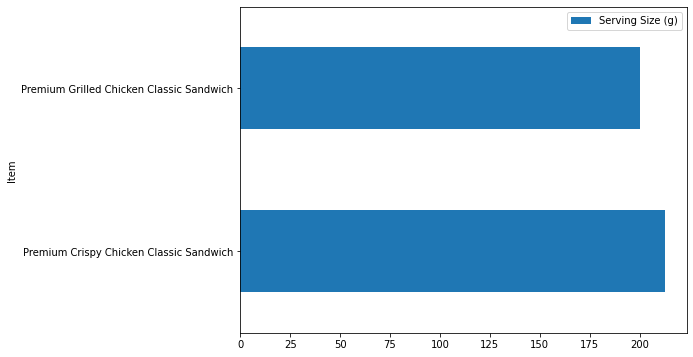

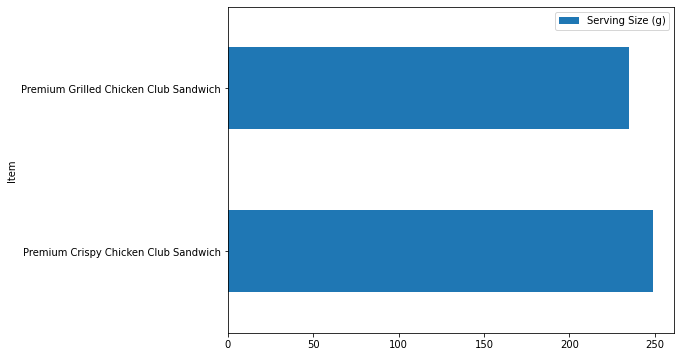

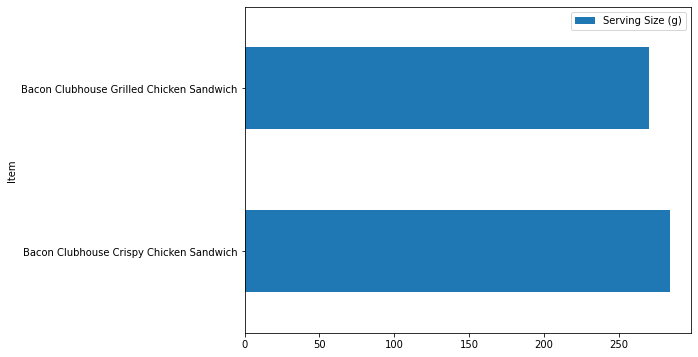

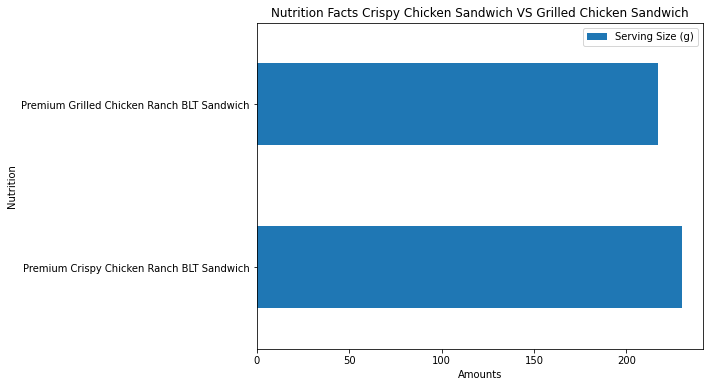

In [115]:
df_ayam_ser = df_ayam.loc[:,['Serving Size (g)','Ayam']]
df_ayam_ser.transpose()

df_ayam_ser.groupby(['Ayam']).plot(kind='barh', figsize=(8, 6))

plt.title('Nutrition Facts Crispy Chicken Sandwich VS Grilled Chicken Sandwich')
plt.xlabel('Amounts')
plt.ylabel('Nutrition')

plt.show()

Dapat dilihat pada bar chart, Masing-masing varian dari Crispy Chicken Sandwich memiliki porsi yang lebih banyak dibandingkan varian dari Grilled Chicken Sandwich yang berkorespondensi.

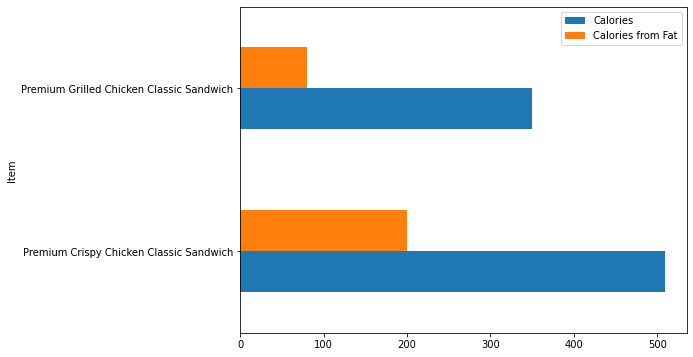

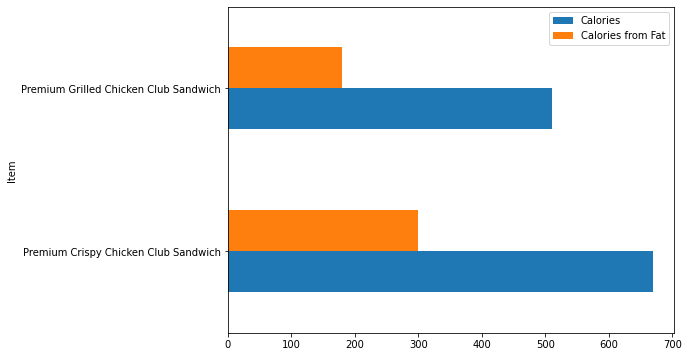

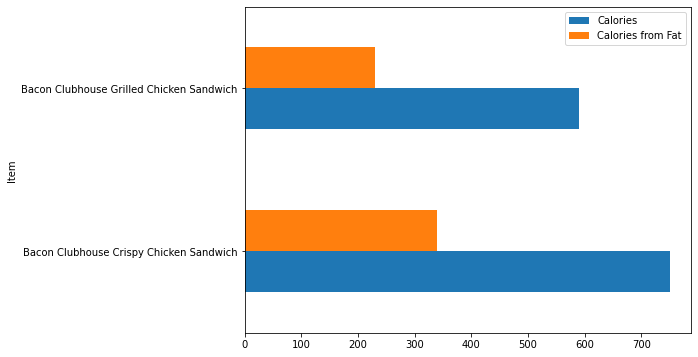

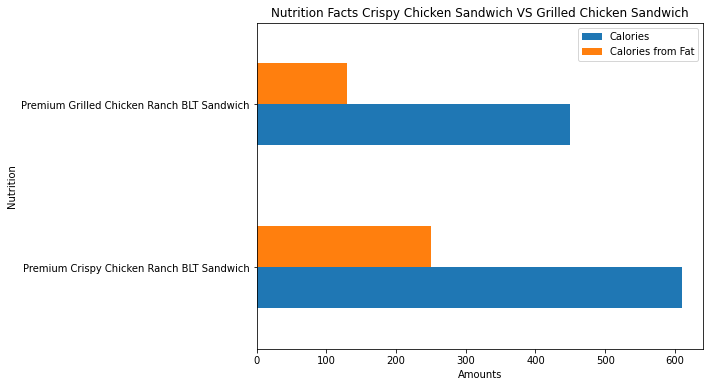

In [116]:
df_ayam_Cal = df_ayam.loc[:,['Calories','Calories from Fat','Ayam']]
df_ayam_Cal.transpose()

df_ayam_Cal.groupby(['Ayam']).plot(kind='barh', figsize=(8, 6))

plt.title('Nutrition Facts Crispy Chicken Sandwich VS Grilled Chicken Sandwich')
plt.xlabel('Amounts')
plt.ylabel('Nutrition')
plt.show()

Begitu juga untuk kandungan Calories dan Calories from fat.

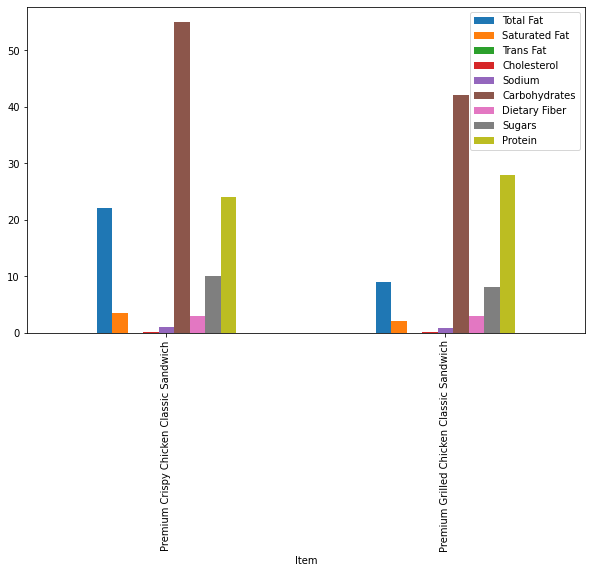

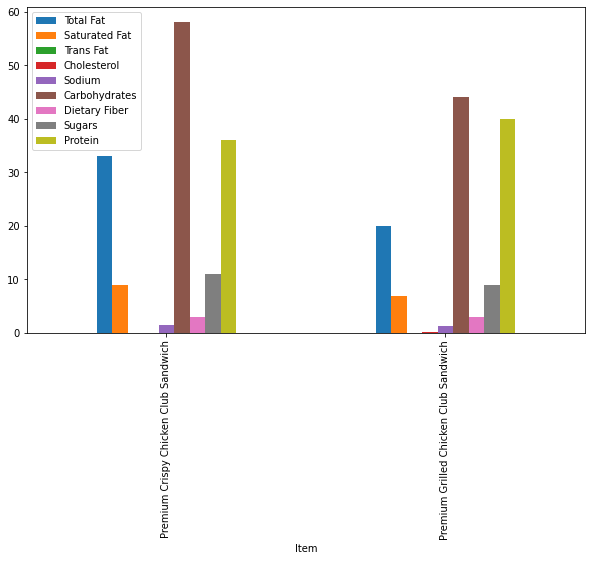

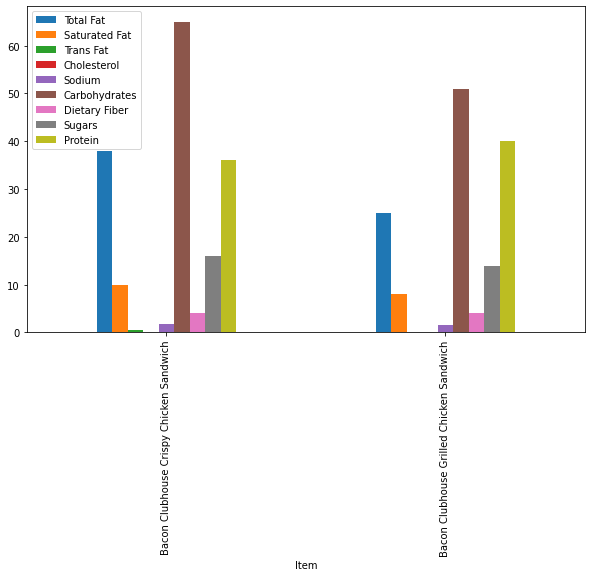

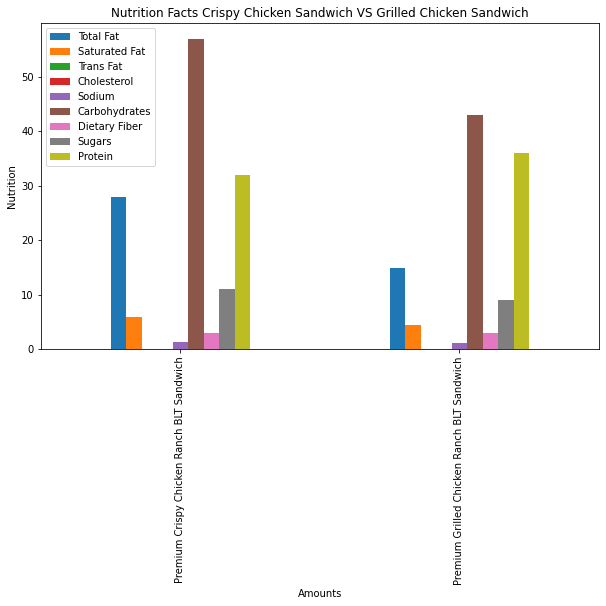

In [117]:
df_ayam_g = df_ayam.loc[:,['Total Fat','Saturated Fat','Trans Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein','Ayam']]

# konversi satuan sodium dan cholesterol dari mg menjadi gram
df_ayam_g['Cholesterol'] = 1/1000 * df_ayam_g['Cholesterol']
df_ayam_g['Sodium'] = 1/1000 * df_ayam_g['Sodium']
df_ayam_g.head()

df_ayam_g.groupby(['Ayam']).plot(kind='bar', figsize=(10, 6))

plt.title('Nutrition Facts Crispy Chicken Sandwich VS Grilled Chicken Sandwich')
plt.xlabel('Amounts')
plt.ylabel('Nutrition')
plt.show()

Untuk Fat, Sodium, Carbohidrat dan Sugar, secara umum crispy chicken sandwich memiliki kandungan yang lebih tinggi dibandingkan dengan Grilled Chicken Sandwich. Disisi lain, Grilled Chicken Sandwich memiliki kandungan protein dan cholesterol sedikit lebih banyak dari pada Crispy Chicken Sandwich.

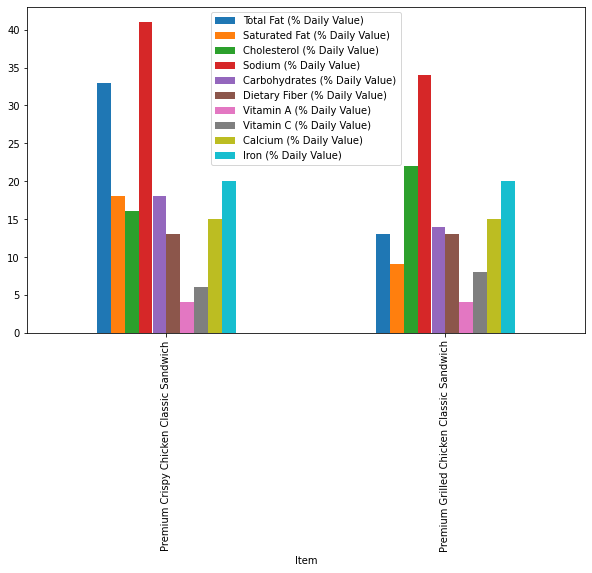

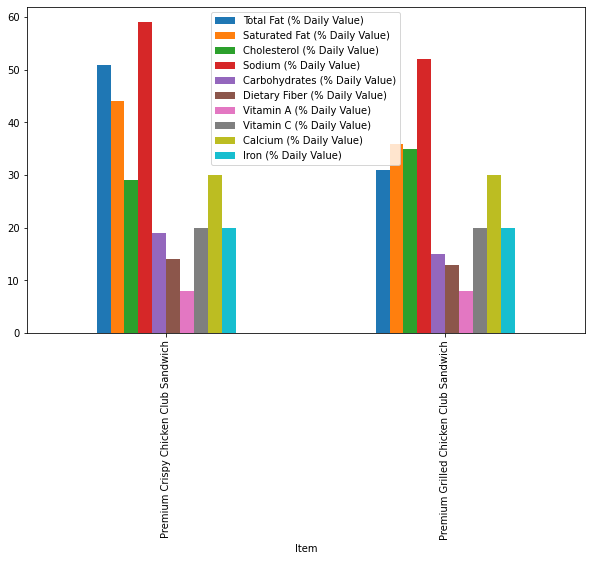

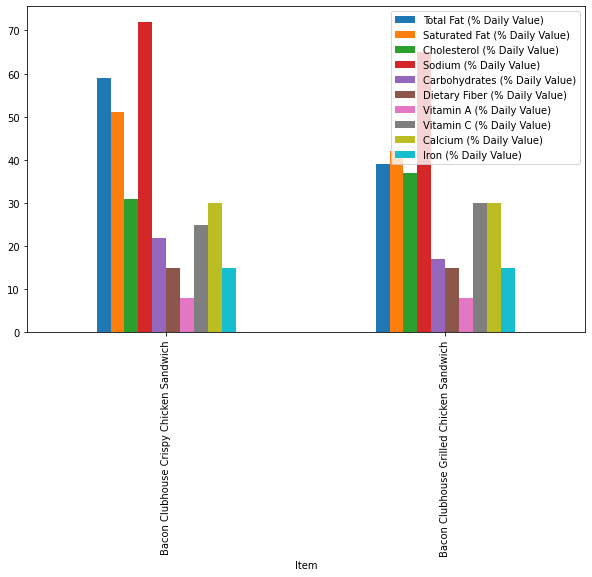

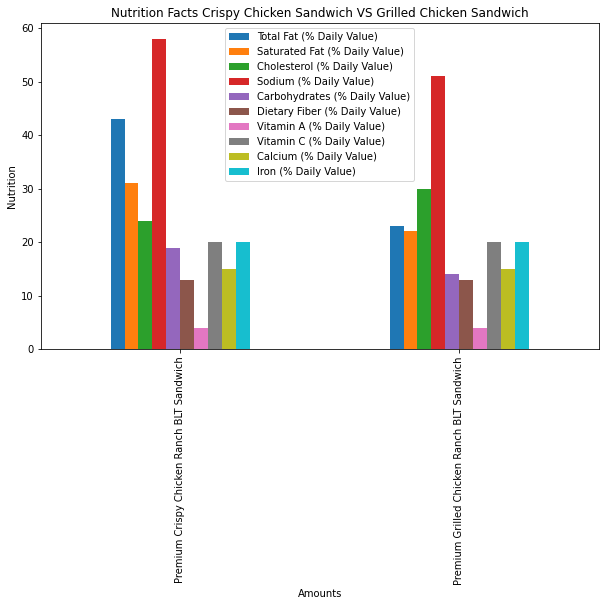

In [118]:
df_ayam_DV = df_ayam.loc[:,['Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)','Sodium (% Daily Value)','Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)','Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Ayam']]
df_ayam_DV

df_ayam_DV.groupby(['Ayam']).plot(kind='bar', figsize=(10, 6))

plt.title('Nutrition Facts Crispy Chicken Sandwich VS Grilled Chicken Sandwich')
plt.xlabel('Amounts')
plt.ylabel('Nutrition')
plt.show()

Yang menjadi perhatian pada bar chart diatas adalah kandungan sodium dari setiap varian Crispy Chicken Sandwich yang cukup tinggi, yaitu berkisar antara 40% - 60 % dari kebutuhan harian. Sebagaimana diketahui untuk penderita Tekanan Darah Tinggi harus menjaga agar konsumsi sodiumnya tetap rendah.

Sedangakan pada masing-masing varian pada Grilled Chicken Sandwich, memiliki kandungan cholesterol yang cukup tinggi, yaitu sekitar 25% - 40% dari kebutuhan harian.

# d) What about ordering egg whites instead of whole eggs?

Sama halnya dengan menyelesaikan permasalahan Chicken Sandwich. Pertama akan dicari setiap jenis makanan yang mengandung telur utuh atau putih telur. Kemudian dikemas dalam satu data frame dan divisualisasikan.

In [119]:
# ambil setiap baris item yang mengandung egg dan egg whites ke dalam data frame df_eggs

items = df['Item'].values.tolist()

eggs = ([match.group (0) for item in items for match in \
       [(re.compile(".*(Egg).*")).search(item)] if match])

In [120]:
df_egg = []

for egg in eggs:
    df_egg.append(df[df['Item']== egg])

df_eggs = pd.concat(df_egg)
df_eggs.set_index('Item',inplace=True)

df_eggs.head(3)

,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Item,,,,,,,,,,,,,,,,,,,,,,,
Egg McMuffin,Breakfast,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
Egg White Delight,Breakfast,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
Sausage McMuffin with Egg,Breakfast,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15


In [121]:
# menyamakan satuan menjadi gram
serv = []

for i in range(0,25):
    serv.append(df_eggs['Serving Size'][i][-6:-3])
print(serv)
df_eggs['Serving Size'] = serv
df_eggs[['Serving Size']] = df_eggs[['Serving Size']].astype(int)
df_eggs.rename(columns={'Serving Size':'Serving Size (g)'}, inplace=True)

['136', '135', '161', '161', '185', '150', '164', '153', '167', '163', '177', '167', '181', '201', '174', '178', '201', '205', '197', '201', '241', '272', '286', '423', '437']


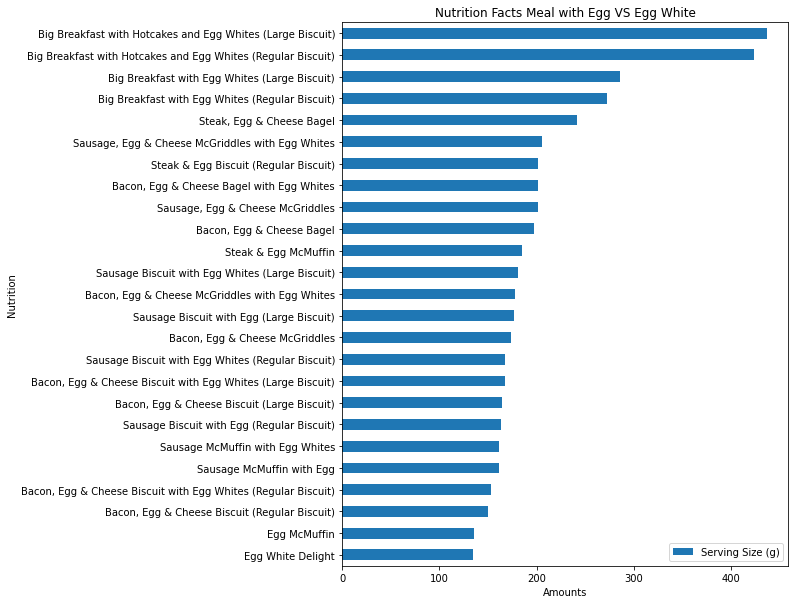

In [122]:
df_eggs_ser = df_eggs.loc[:,['Serving Size (g)']]
df_eggs_ser.sort_values(['Serving Size (g)'], ascending=True, axis=0, inplace=True)

df_eggs_ser.plot(kind='barh', figsize=(8, 10))

plt.title('Nutrition Facts Meal with Egg VS Egg White')
plt.xlabel('Amounts')
plt.ylabel('Nutrition')

plt.show()

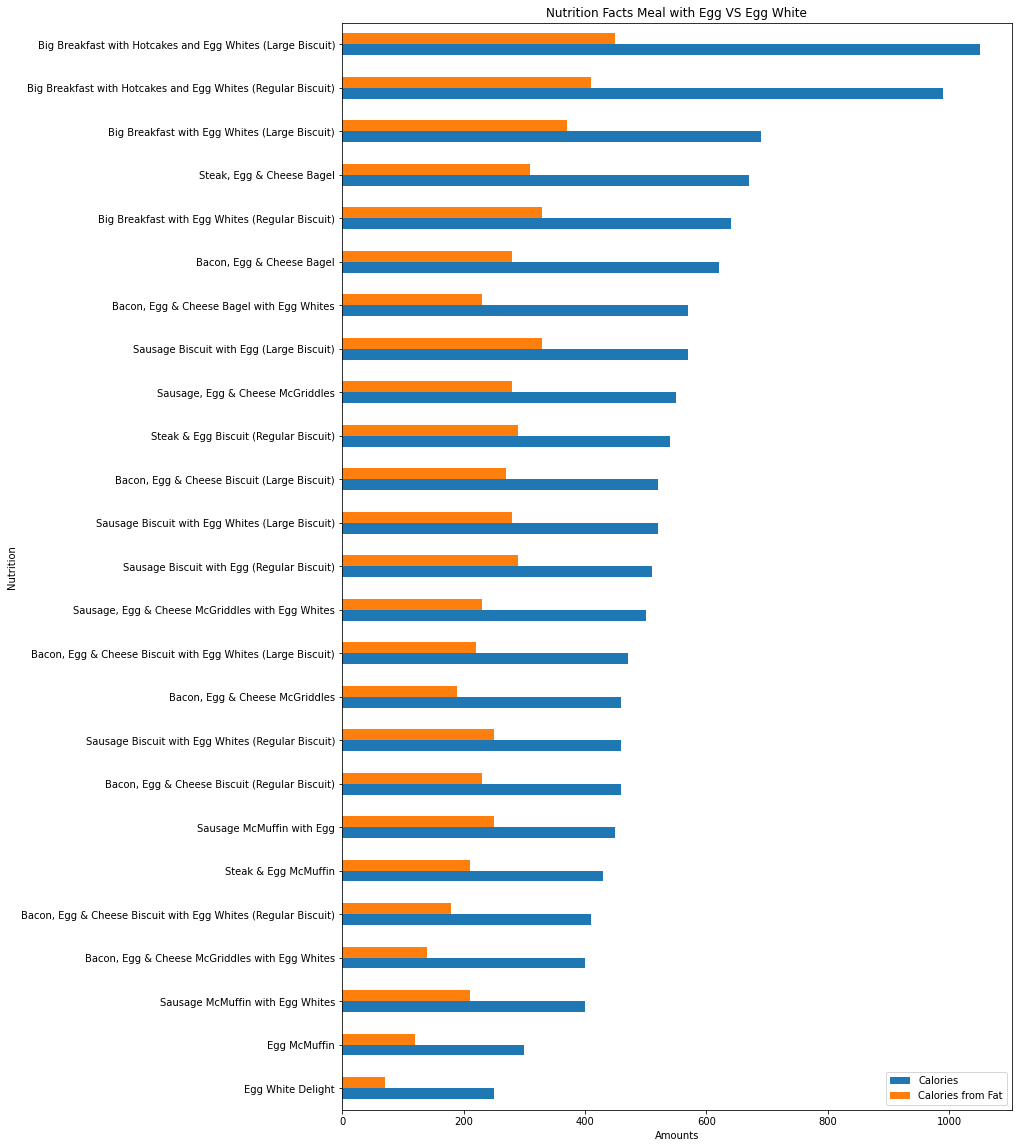

In [123]:
df_eggs_Cal = df_eggs.loc[:,['Calories','Calories from Fat']]
df_eggs_Cal.sort_values(['Calories'], ascending=True, axis=0, inplace=True)
df_eggs_Cal.plot(kind='barh', figsize=(12, 20))

plt.title('Nutrition Facts Meal with Egg VS Egg White')
plt.xlabel('Amounts')
plt.ylabel('Nutrition')
plt.show()

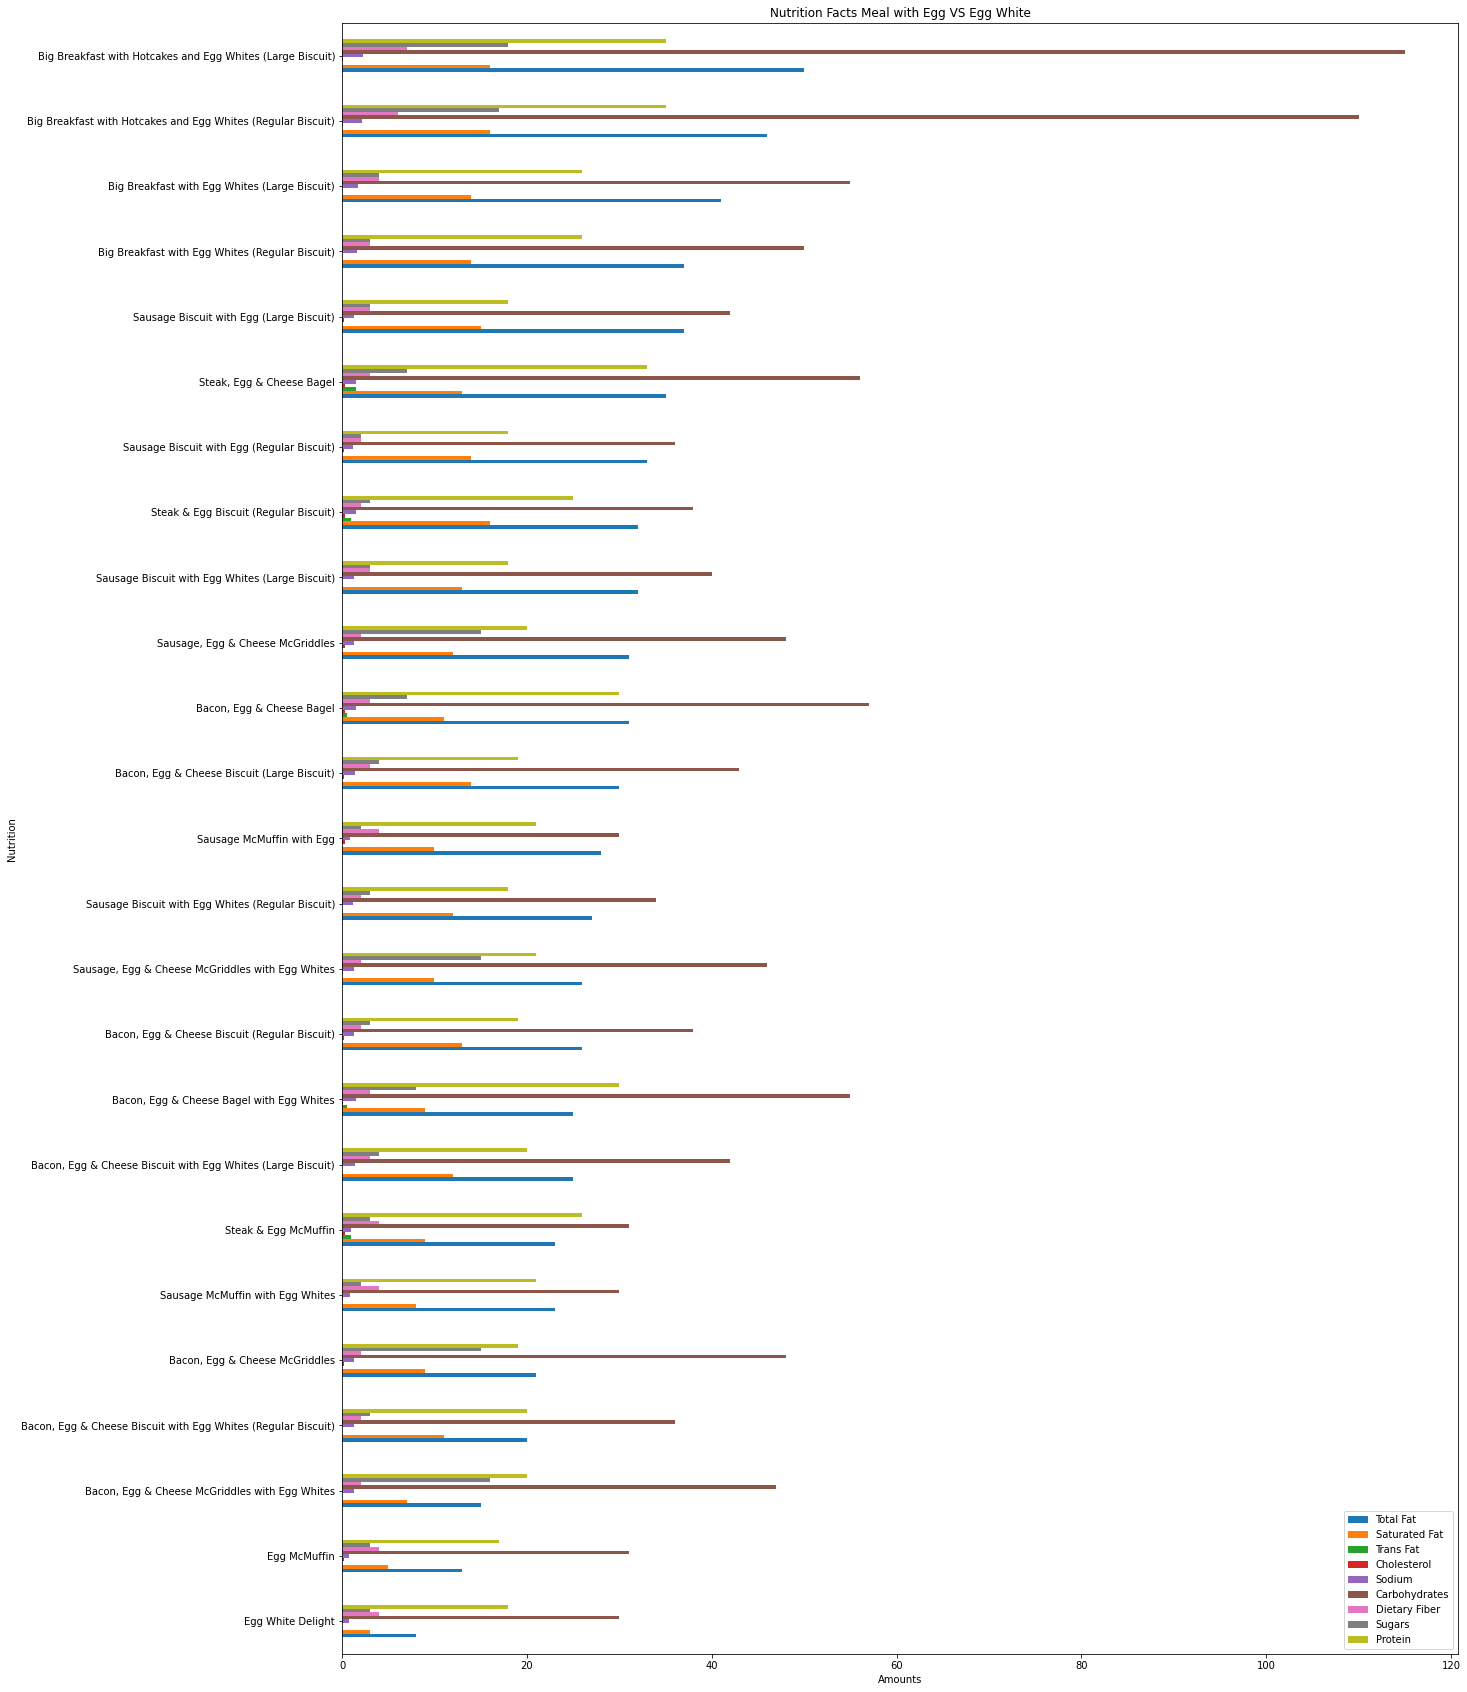

In [124]:
df_eggs_g = df_eggs.loc[:,['Total Fat','Saturated Fat','Trans Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein']]
df_eggs_g.sort_values(['Total Fat'], ascending=True, axis=0, inplace=True)
# konversi satuan sodium dan cholesterol dari mg menjadi gram
df_eggs_g['Cholesterol'] = 1/1000 * df_eggs_g['Cholesterol']
df_eggs_g['Sodium'] = 1/1000 * df_eggs_g['Sodium']
df_eggs_g.head()

df_eggs_g.plot(kind='barh', figsize=(20, 30))

plt.title('Nutrition Facts Meal with Egg VS Egg White')
plt.xlabel('Amounts')
plt.ylabel('Nutrition')
plt.show()

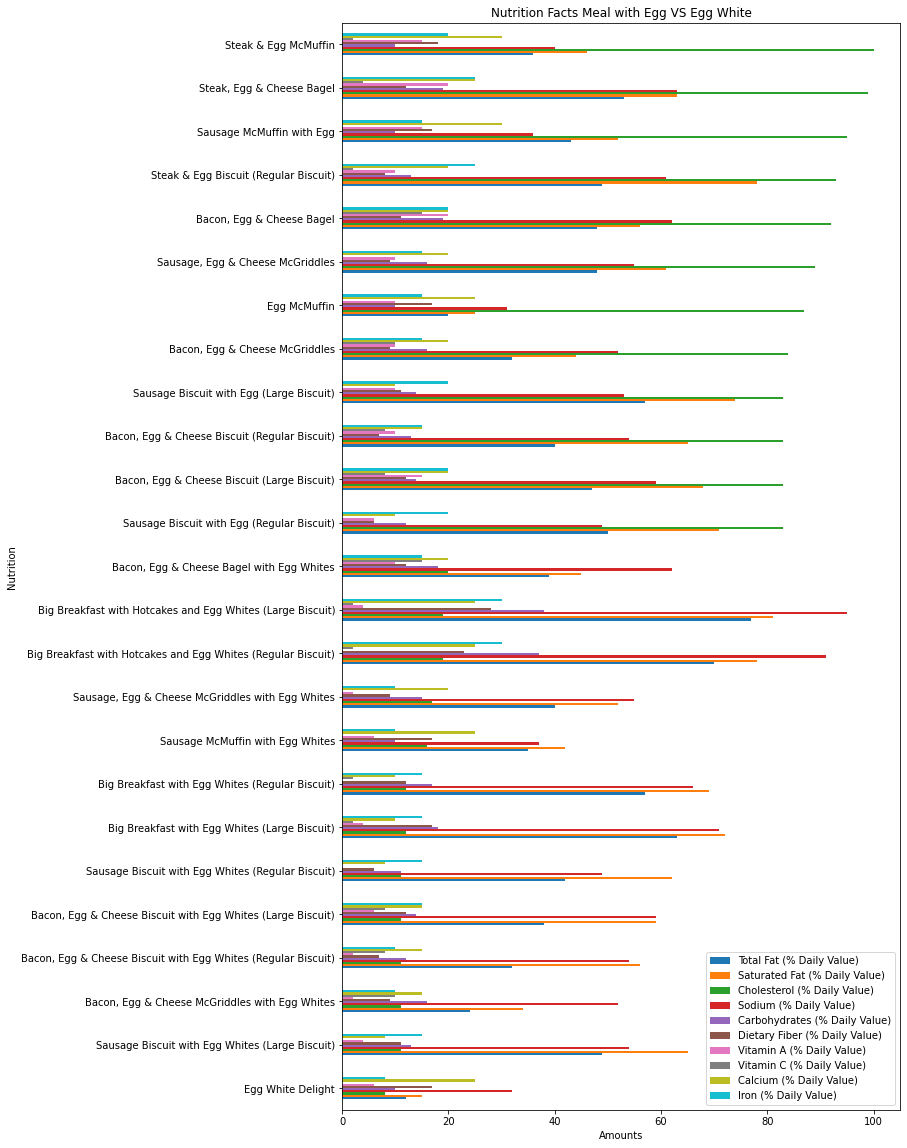

In [125]:
df_eggs_DV = df_eggs.loc[:,['Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)','Sodium (% Daily Value)','Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)','Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']]
df_eggs_DV.sort_values(['Cholesterol (% Daily Value)'], ascending=True, axis=0, inplace=True)
df_eggs_DV.plot(kind='barh', figsize=(10, 20))

plt.title('Nutrition Facts Meal with Egg VS Egg White')
plt.xlabel('Amounts')
plt.ylabel('Nutrition')
plt.show()

Kesimpulan yang diambil dengan melihat grafik diatas:
Makanan yang mengandung telur utuh cenderung lebih tinggi kandungan Fat dan kolesterolnya dibandingkan dengan menggunakan putih telur.



# e) What is the least number of items could you order from the menu to meet one day's nutritional requirements?

# Untuk menyelesaikan permasalahan ini, didefinisikan Kebutuhan kalori untuk laki-laki usia produktif, yaitu umur 19-29 tahun adalah 2650 kkal.

Dikutip dari Peraturan Menteri Kesehatan No.28 Tahun 2019 tentang Angka Kecukupan Gizi. 




In [126]:
# lihat jenis makanan yang memiliki kalori paling besar

df.sort_values(['Calories'], ascending=False, axis=0, inplace=True)
df.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,265,89,3600,150,118,39,6,24,1,87,0,15,8,25
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,575,192,2260,94,116,39,7,28,17,36,15,2,30,40


Pada tabel di atas, dapat dilihat 2 jenis makanan yang memiliki jumlah kalori paling banyak sudah dapat mencukupi bahkan melebihi kebutuhan asupan energi seorang pria dengan usia produktif.